In [1]:
import warnings
warnings.filterwarnings("ignore")
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from evaluation.mol_structure import draw_one_mol, draw_graphs
from evaluation.new_structural_metric import symmetric_graph_set_distance,atom,cycle,neighborhood
from evaluate import evaluate
#import utils.graph_generators as gen
import torch
import networkx as nx
import os 
import sys
import json
current = os.getcwd()
parent = os.path.dirname(current)
sys.path.append(parent)
import rdkit
import numpy as np
from evaluation.utils import get_data,get_graph_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess,get_generated_graph_data,_preprocess



In [4]:
ls

GIN_train.py                       graph_set_similarities copy.ipynb
LICENSE                            graph_set_similarities.ipynb
README.md                          interface copy.ipynb
__pycache__/                       interface.ipynb
add_metrics.ipynb                  main.py
compare generators.ipynb           notebook examples/
config.py                          permuters/
create_bash_script.py              requirements.txt
data/                              result.json
data_visualization - Copy.ipynb    smiles_datasets_experiments.txt
evaluate.py                        structural_distances.csv
evaluation/                        utils/
experiment_results/


In [2]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral','common_substructures']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_1']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


synthetic_1_25


FileNotFoundError: [Errno 2] No such file or directory: 'data/graphs/datasets/synthetic_1/synthetic_1_25/synthetic_1_25_gen_neg_swingnn.p'

In [22]:
name='synthetic_1_25'
import pandas as pd
path=r'data/graphs/datasets'
dataset=name[:name.rindex('_')]
train1_neg_graphs=pd.read_pickle(path + f'/{dataset}/{name}/{name}_train1_neg.p')

In [18]:
train1_neg_graphs=pd.read_pickle('data/graphs/datasets/synthetic_1/synthetic_1_25/synthetic_1_25_train1_neg.p')


In [19]:
train1_neg_graphs

In [ ]:
data/graphs/datasets/synthetic_1/synthetic_1_25/synthetic_1_25_train1_neg.p

In [2]:
train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')


NameError: name 'dataset_name' is not defined

In [8]:
train1_graphs=_preprocess(train1_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
train2_graphs=_preprocess(train2_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
test_graphs=_preprocess(test_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')
generated_graphs=_preprocess(generated_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name='')


In [1]:

def auc_estimate(pos_graphs,neg_graphs,test_pos_graphs, test_neg_graphs):
    train_graphs=pos_graphs+neg_graphs
    train_targets=np.array([1]*len(pos_graphs) + [0]*len(neg_graphs))
    test_graphs=test_pos_graphs+test_neg_graphs
    test_targets=np.array([1]*len(test_pos_graphs) + [0]*len(test_neg_graphs))
    #print(test_targets)
    #random.shuffle(test_targets)
    #print(test_targets)
    #transform
    vectorizer = Vectorizer(r=2,d=4)
    train_data_mtx = vectorizer.transform(train_graphs)
    test_data_mtx = vectorizer.transform(test_graphs)
    estimator = ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0).fit(train_data_mtx, train_targets)
    preds = estimator.predict_proba(test_data_mtx)[:,1]
    auc1 = roc_auc_score(test_targets, preds)
    return auc1

In [50]:
vectorizer = Vectorizer(r=2,d=4)
train_data_mtx = vectorizer.transform(_preprocess(train1_graphs+generated_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name=''))
test_data_mtx = vectorizer.transform(_preprocess(test_graphs,label=0,discrete_node_label_name='',discrete_edge_label_name='',continuous_node_label_name='',continuous_edge_label_name=''))
estimator = ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0).fit(train_data_mtx, list(train1_targets)+list(generated_targets))
preds = estimator.predict_proba(test_data_mtx)[:,1]
auc1 = roc_auc_score(test_targets, preds)
auc1



0.49685

In [39]:
    train1_graphs[0].edges(data=True)

EdgeDataView([(0, 1, {'label': 0, 'true_label': 'source', 'attr': 0}), (0, 13, {'label': 0, 'true_label': 'joint', 'attr': 0}), (1, 2, {'label': 0, 'true_label': 'source', 'attr': 0}), (1, 17, {'label': 0, 'true_label': 'joint', 'attr': 0}), (2, 3, {'label': 0, 'true_label': 'source', 'attr': 0}), (2, 11, {'label': 0, 'true_label': 'joint', 'attr': 0}), (3, 4, {'label': 0, 'true_label': 'source', 'attr': 0}), (4, 5, {'label': 0, 'true_label': 'source', 'attr': 0}), (4, 16, {'label': 0, 'true_label': 'joint', 'attr': 0}), (5, 6, {'label': 0, 'true_label': 'source', 'attr': 0}), (5, 11, {'label': 0, 'true_label': 'joint', 'attr': 0}), (5, 12, {'label': 0, 'true_label': 'joint', 'attr': 0}), (6, 7, {'label': 0, 'true_label': 'source', 'attr': 0}), (6, 13, {'label': 0, 'true_label': 'joint', 'attr': 0}), (7, 8, {'label': 0, 'true_label': 'source', 'attr': 0}), (8, 9, {'label': 0, 'true_label': 'source', 'attr': 0}), (8, 16, {'label': 0, 'true_label': 'joint', 'attr': 0}), (10, 11, {'label'

In [12]:
train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')

In [20]:

train1_graphs[0].nodes(data=True)

NodeDataView({0: {'true_label': 1, 'label': 1}, 1: {'true_label': 2, 'label': 2}, 2: {'true_label': 1, 'label': 1}, 3: {'true_label': 0, 'label': 0}, 4: {'true_label': 0, 'label': 0}, 5: {'true_label': 2, 'label': 2}, 6: {'true_label': 2, 'label': 2}, 7: {'true_label': 0, 'label': 0}, 8: {'true_label': 0, 'label': 0}, 9: {'true_label': 0, 'label': 0}, 10: {'true_label': 0, 'label': 0}, 11: {'true_label': 2, 'label': 2}, 12: {'true_label': 1, 'label': 1}, 13: {'true_label': 1, 'label': 1}, 14: {'true_label': 2, 'label': 2}, 15: {'true_label': 0, 'label': 0}, 16: {'true_label': 2, 'label': 2}, 17: {'true_label': 0, 'label': 0}, 18: {'true_label': 0, 'label': 0}, 19: {'true_label': 1, 'label': 1}})

In [5]:
metrics

NameError: name 'metrics' is not defined

In [2]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral','common_substructures']
device=torch.device('cpu')
metrics_type=['nn', 'structural', 'auc_roc']
generators=['swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_path_vs_tree']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

train1_graphs

synthetic_path_vs_tree_25
Now computing classifier based metrics



Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


Now computing structural based metrics
Now computing the auc_roc based  metric
0.6191500000000001 0.958 0.5897999999999999 0.55225
{'activations_time': 0.14850854873657227, 'fid': 8.786615339649302, 'fid_time': 0.15551066398620605, 'kid': 1.0342848, 'kid_time': 23.377717971801758, 'precision': 0.955, 'recall': 0.965, 'f1_pr': 0.9599839586045978, 'precision_time': 0.23130130767822266, 'recall_time': 0.23130130767822266, 'f1_pr_time': 0.23130130767822266, 'density': 1.036, 'coverage': 0.965, 'f1_dc': 0.999250392399876, 'density_time': 0.19552230834960938, 'coverage_time': 0.19552230834960938, 'f1_dc_time': 0.19552230834960938, 'mmd_rbf': 0.030211329460144043, 'mmd_rbf_time': 0.23318099975585938, 'mmd_linear': 4.4849343, 'mmd_linear_time': 0.14850854873657227, 'wl_mmd': 0.004786528044483762, 'wl_mmd_time': 0.4519832134246826, 'nspdk_mmd': 0.006936135667959642, 'nspdk_mmd_time': 7.687263011932373, 'degree_mmd': 0.0005645756257373069, 'degree_mmd_time': 26.561513, 'cluster_mmd': 0.007547497

In [4]:
def draw_graphs(graphs, node_color='label', edge_color='label', n_graphs_per_line=13, size=3):
    unique_node_labels = list(sorted(set(str(graph.nodes[u].get(node_color,0)) for graph in graphs for u in graph.nodes())))
    node_labels_color_map = {unique_node_label: i/len(unique_node_labels) for i,unique_node_label in enumerate(unique_node_labels)}
    unique_edge_labels = list(sorted(set(str(graph.edges[u,v].get(edge_color,0)) for graph in graphs for u,v in graph.edges())))
    edge_labels_color_map = {unique_edge_label: i/len(unique_edge_labels) for i,unique_edge_label in enumerate(unique_edge_labels)}
    n = len(graphs)
    n_lines = np.ceil(n / n_graphs_per_line).astype(int)
    fig, axs = plt.subplots(n_lines, n_graphs_per_line, figsize=(size*n_graphs_per_line,size*n_lines))
    for t,graph in enumerate(graphs):
        col = t % n_graphs_per_line
        row = t // n_graphs_per_line
        #if n_lines>1: ax = axs[row,col]
        ax = axs[col]
        ax.axis('off')
        pos = nx.kamada_kawai_layout(graph)
        node_colors = [node_labels_color_map[str(graph.nodes[u].get(node_color,0))] for u in graph.nodes()]
        nx.draw_networkx_nodes(graph, pos, node_size=80, node_color=node_colors, cmap='Set3', linewidths=1, edgecolors='k', ax=ax)
        edge_colors = [edge_labels_color_map[str(graph.edges[u,v].get(edge_color,0))] for u,v in graph.edges()]
        nx.draw_networkx_edges(graph, pos, width=1, style='-', edge_color=edge_colors, edge_cmap=plt.get_cmap('tab20'), ax=ax)    
    plt.show()

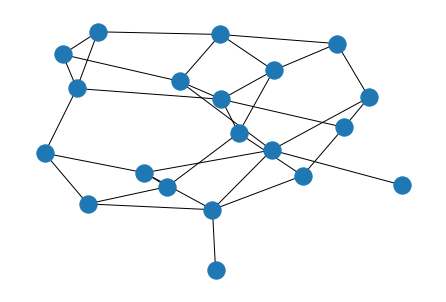

In [10]:
nx.draw(generated_graphs[0])

sample of positive graphs


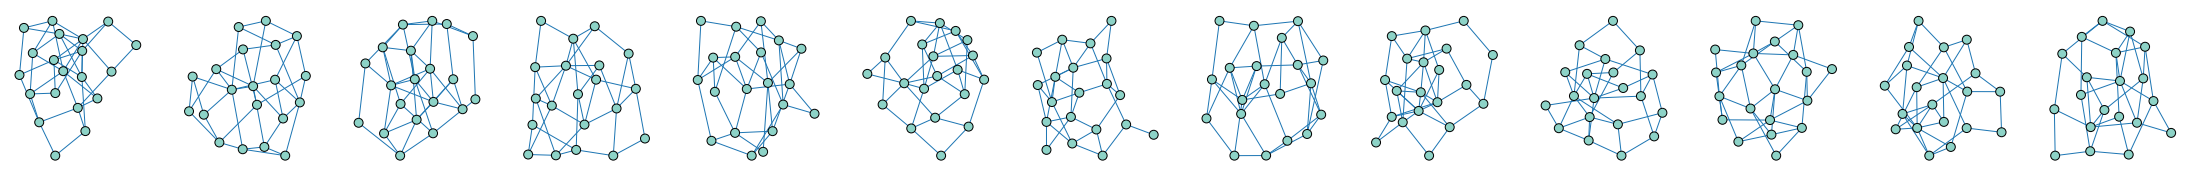

sample of negative graphs


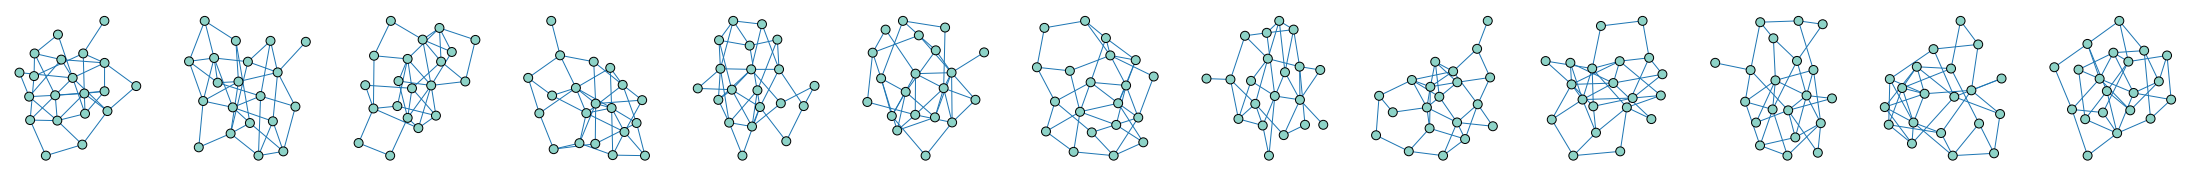

sample of generated positive graphs


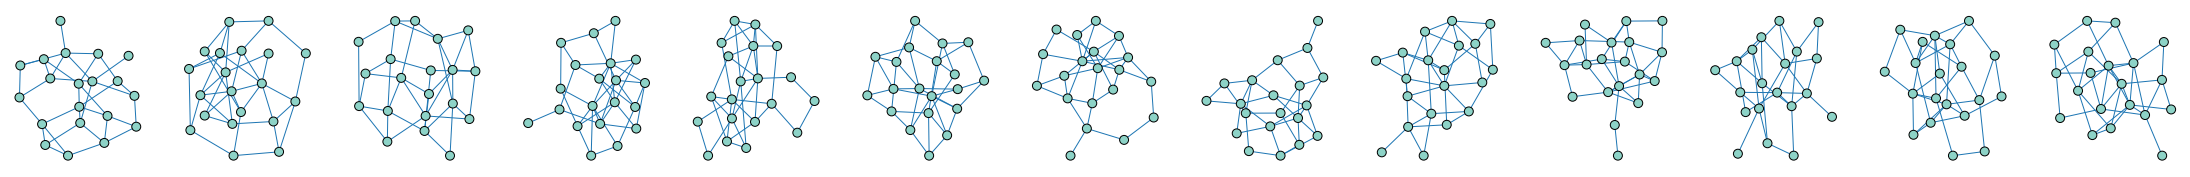

sample of generated negative graphs


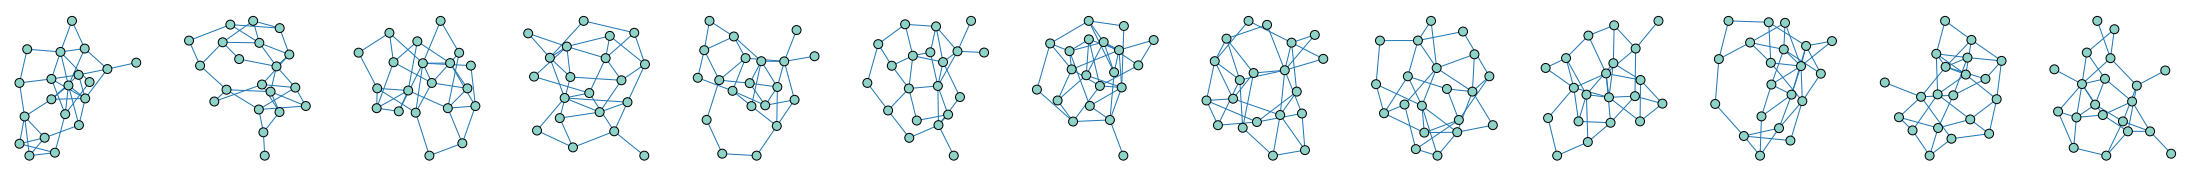

In [16]:
import matplotlib.pyplot as plt
print('sample of positive graphs')
draw_graphs(list(train1_graphs[:13]))   
print('sample of negative graphs')
draw_graphs(list(train1_graphs[len(train1_graphs)-13:]),n_graphs_per_line=13)   
import matplotlib.pyplot as plt
print('sample of generated positive graphs')
draw_graphs(list(generated_graphs[:13]))   
print('sample of generated negative graphs')
draw_graphs(list(generated_graphs[len(generated_graphs)-13:]),n_graphs_per_line=13)   


In [ ]:
structural_statistic=['WL', 'nspdk','degree','cluster', 'spectral','common_substructures']
device=torch.device('cpu')
metrics_type=['nn','molecular' 'structural', 'auc_roc']
generators=['swingnn']
splits=['_25','_33','_40','_50']
metrics={}
for generator in generators:
    for dataset_name in ['synthetic_path_vs_tree']:
        for split in splits:
            print(dataset_name+split)
            train1_graphs,train1_targets,train2_graphs,train2_targets,test_graphs,test_targets=get_graph_data(dataset_name+split, path=r'data/graphs/datasets')
            generated_graphs, generated_targets= get_generated_graph_data(dataset_name+split,generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


In [26]:
import  pandas as pd

x=pd.DataFrame(metrics, index=[i for i in range(1)])

,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,recall_time,...,degree_mmd,degree_mmd_time,cluster_mmd,cluster_mmd_time,spectral_mmd,spectral_mmd_time,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,dataset,generator_name
0,0.203002,22.83514,0.207999,2.545701,0.235,0.885,0.845,0.864548,0.310957,0.310957,...,0.001696,22.653735,0.010858,29.096303,0.002891,25.953271,0,104.330044,synthetic_path_vs_tree_50,swingnn


In [5]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
generators=['swingnn']
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


ames_25
Now computing classifier based metrics
fid calculation produces singular product; adding 1e-06 to diagonal of cov estimates



Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8464607567551096 0.8834672166739036 0.7008183452552353 0.8311936756785582
{'activations_time': 0.37209296226501465, 'fid': 19.838928410262753, 'fid_time': 0.3801088333129883, 'kid': 0.98068017, 'kid_time': 9.29641580581665, 'precision': 0.9290220820189274, 'recall': 0.7651217596229379, 'f1_pr': 0.8391537278618989, 'precision_time': 0.5270919799804688, 'recall_time': 0.5270919799804688, 'f1_pr_time': 0.5270919799804688, 'density': 0.8481072555205048, 'coverage': 0.6142969363707776, 'f1_dc': 0.7125214637597094, 'density_time': 0.46811747550964355, 'coverage_time': 0.46811747550964355, 'f1_dc_time': 0.46811747550964355, 'mmd_rbf': 0.0890798568725586, 'mmd_rbf_time': 0.7022063732147217, 'mmd_linear': 13.9725485, 'mmd_linear_time': 0.37209296226501465, 'nspdk_mmd': 0.030299128881961956, 'nspdk_mmd_time': 10.842635154724121, 'wl_mmd': 0.03751027368952742, 'wl_mmd_time': 

In [12]:
import  rdkit
rdkit.Chem.Draw.MolsToGridImage(molsPerRow=3)

TypeError: ShowMols() missing 1 required positional argument: 'mols'

# Data collection

## Hide

In [2]:
#disable  
from rdkit import RDLogger 
RDLogger.EnableLog('rdApp.*')
#RDLogger.DisableLog('rdApp.*')        
name='ames'                                                                                                                                                                                                                                                                                                                                                                                                                                                               
path='data/smiles/{}/train1_smiles.txt'.format(name)
#rom data.smiles.carcinogens import test_smiles
reference_smiles_list = []
with open(path) as my_file:
    for line in my_file:
        reference_smiles_list.append(line)
reference_nx_graphs=list_of_smiles_to_nx_graphs(reference_smiles_list)
"""
print(reference_smiles_list[0])
mol = Chem.MolFromSmiles(reference_smiles_list[0])
Chem.Kekulize(mol)
Chem.RemoveStereochemistry(mol)
Chem.rdmolops.AddHs(mol)
print(mol_to_smiles([mol])[0])
print(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0])
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[0]))
rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]))

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )

#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )
"""

'\nprint(reference_smiles_list[0])\nmol = Chem.MolFromSmiles(reference_smiles_list[0])\nChem.Kekulize(mol)\nChem.RemoveStereochemistry(mol)\nChem.rdmolops.AddHs(mol)\nprint(mol_to_smiles([mol])[0])\nprint(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0])\nrdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[0]))\nrdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]))\n\n#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )\n\n#rdkit.Chem.Draw.MolsToGridImage(mols = [Chem.MolFromSmiles(mol_to_smiles([nx_to_mol(reference_nx_graphs[0])])[0]),   Chem.MolFromSmiles(reference_smiles_list[0])  ]  )\n'

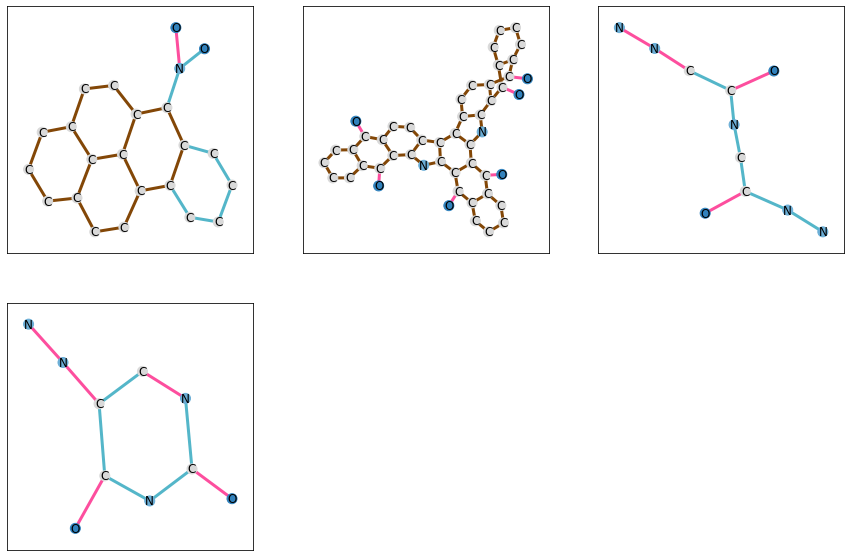

In [66]:
list_of_G=reference_nx_graphs[:4]
#for n , d in (G.nodes().items() ):
    #print(str(d['label'][0]))

draw_graphs(list_of_G)

[N-]=[N+]=CC(=O)NCC(=O)NN



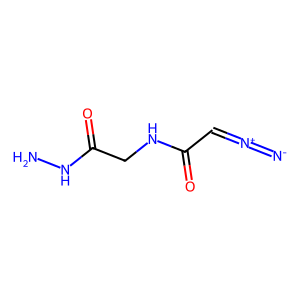

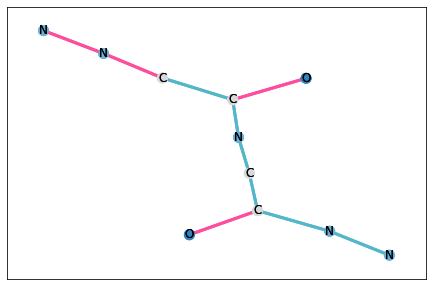

In [68]:
draw_one_mol(reference_nx_graphs[2])
print(reference_smiles_list[2])
draw_one_mol(reference_nx_graphs[2])

rdkit.Chem.Draw.MolToImage(mol = Chem.MolFromSmiles(reference_smiles_list[2]))


In [69]:
reference_nx_graphs[0].nodes(data=True)

NodeDataView({0: {'label': 8, 'attr': [7, 0, 1, 5, 0, 0, 1, 0, 0], 'label_name': 'O'}, 1: {'label': 7, 'attr': [6, 0, 3, 6, 0, 0, 1, 0, 0], 'label_name': 'N'}, 2: {'label': 8, 'attr': [7, 0, 1, 4, 0, 0, 1, 0, 0], 'label_name': 'O'}, 3: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 4: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 5: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 6: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 7: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 8: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 9: {'label': 6, 'attr': [5, 0, 3, 5, 0, 0, 1, 1, 1], 'label_name': 'C'}, 10: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 11: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 12: {'label': 6, 'attr': [5, 0, 3, 5, 1, 0, 1, 1, 1], 'label_name': 'C'}, 13: {'label': 6, 'attr': [5, 0, 3,

In [70]:
reference_nx_graphs[0].edges(data=True)

EdgeDataView([(0, 1, {'label': 2, 'attr': [1, 0, 1], 'edge_label': 'DOUBLE'}), (1, 2, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (1, 3, {'label': 1, 'attr': [0, 0, 1], 'edge_label': 'SINGLE'}), (3, 4, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (3, 16, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (4, 5, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (4, 22, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (5, 6, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (5, 19, {'label': 1, 'attr': [0, 0, 0], 'edge_label': 'SINGLE'}), (6, 7, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (6, 17, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (7, 8, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (8, 9, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (9, 10, {'label': 1, 'attr': [3, 0, 1], 'edge_label': 'AROMATIC'}), (9, 18, {'label': 1, 'attr': [3, 0, 1], 'edge_label':

## Show


In [2]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
device=torch.device('cpu')
structural_statistic=['nspdk','WL']
metrics_type=['nn', 'structural','molecular', 'auc_roc']
#leave it blank to compute all the structural structures 
generators=['hiervae','wgan','stgg','moflow','gdss','jtnn']

In [3]:
device=torch.device('cpu')
metrics={}
for generator in generators:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)
            break
        break
    brea


ames_25
Now computing classifier based metrics



Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))


Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8277675571908495 0.872026190095299 0.5720598989875905 0.8186699651865226
{'activations_time': 0.3725905418395996, 'fid': 121.43981799207279, 'fid_time': 0.3765876293182373, 'kid': 9.407125, 'kid_time': 9.418147563934326, 'precision': 0.989516129032258, 'recall': 0.10761979575805185, 'f1_pr': 0.1941428611167597, 'precision_time': 0.6866919994354248, 'recall_time': 0.6866919994354248, 'f1_pr_time': 0.6866919994354248, 'density': 0.6798387096774194, 'coverage': 0.07619795758051846, 'f1_dc': 0.13705290587852567, 'density_time': 0.5635957717895508, 'coverage_time': 0.5635957717895508, 'f1_dc_time': 0.5635957717895508, 'mmd_rbf': 0.6937805712223053, 'mmd_rbf_time': 0.9992003440856934, 'mmd_linear': 91.91981, 'mmd_linear_time': 0.3725905418395996, 'nspdk_mmd': 0.18164687312546535, 'nspdk_mmd_time': 12.985737800598145, 'wl_mmd': 0.394148303905733, 'wl_mmd_time': 1.48797965

In [4]:
device=torch.device('cpu')
metrics={}
for generator in ['train1']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train1_graphs,train1_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8277675571908495 0.872026190095299 0.8277675571908495 0.8277675571908495
{'activations_time': 0.39657092094421387, 'fid': -9.027587566379225e-10, 'fid_time': 0.4005696773529053, 'kid': -0.91865253, 'kid_time': 0.4525737762451172, 'precision': 1.0, 'recall': 1.0, 'f1_pr': 1.00001, 'precision_time': 0.557570219039917, 'recall_time': 0.557570219039917, 'f1_pr_time': 0.557570219039917, 'density': 1.2000000000000002, 'coverage': 1.0, 'f1_dc': 1.090919173552968, 'density_time': 0.49657297134399414, 'coverage_time': 0.49657297134399414, 'f1_dc_time': 0.49657297134399414, 'mmd_rbf': 0, 'mmd_rbf_time': 0.7575733661651611, 'mmd_linear': 0.0, 'mmd_linear_time': 0.39657092094421387, 'nspdk_mmd': 0.0, 'nspdk_mmd_time': 13.609911918640137, 'wl_mmd': 0.0, 'wl_mmd_time': 1.4926514625549316, 'valid': 1.0, 'unique@1000': 0.668, 'unique@

In [5]:
device=torch.device('cpu')
metrics={}
for generator in ['train2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=train2_graphs,train2_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8277675571908495 0.872026190095299 0.8524940771381342 0.872026190095299
{'activations_time': 0.3430211544036865, 'fid': 2.9573999553177828, 'fid_time': 0.34702014923095703, 'kid': -0.031524837, 'kid_time': 0.39002013206481934, 'precision': 0.9685781618224666, 'recall': 0.9732914375490966, 'f1_pr': 0.9709390797498794, 'precision_time': 0.4820244312286377, 'recall_time': 0.4820244312286377, 'f1_pr_time': 0.4820244312286377, 'density': 0.9569520816967793, 'coverage': 0.9622937941869599, 'f1_dc': 0.9596255043984802, 'density_time': 0.4250214099884033, 'coverage_time': 0.4250214099884033, 'f1_dc_time': 0.4250214099884033, 'mmd_rbf': 0.002333343029022217, 'mmd_rbf_time': 0.6130597591400146, 'mmd_linear': 0.13216905, 'mmd_linear_time': 0.3430211544036865, 'nspdk_mmd': 0.0014313108619964932, 'nspdk_mmd_time': 12.03744053840637

In [6]:
device=torch.device('cpu')
metrics={}
for generator in ['train1/2+train2/2']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            half=len(train1_graphs)//2
            half2=len(train2_graphs)//2
            train3_graphs,train3_targets=train1_graphs[:half]+train2_graphs[:half], train1_targets[:half]+train2_targets[:half]
            generated_graphs, generated_targets=train3_graphs,train3_targets
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)

ames_25
Now computing classifier based metrics
Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8277675571908495 0.872026190095299 0.8524236122220444 0.8573951977207457
{'activations_time': 0.3359982967376709, 'fid': 1.421730497357089, 'fid_time': 0.33899974822998047, 'kid': -0.32742655, 'kid_time': 0.3829989433288574, 'precision': 0.9803459119496856, 'recall': 0.9913589945011784, 'f1_pr': 0.9858316964025888, 'precision_time': 0.47299695014953613, 'recall_time': 0.47299695014953613, 'f1_pr_time': 0.47299695014953613, 'density': 1.0937106918238995, 'coverage': 0.9960722702278083, 'f1_dc': 1.0426205814518537, 'density_time': 0.4140007495880127, 'coverage_time': 0.4140007495880127, 'f1_dc_time': 0.4140007495880127, 'mmd_rbf': 0.0007827576482668519, 'mmd_rbf_time': 0.6325817108154297, 'mmd_linear': 0.038427547, 'mmd_linear_time': 0.33699917793273926, 'nspdk_mmd': 0.0006924009204816173, 'nspdk_mmd_time': 11.9157557487

In [ ]:
device=torch.device('cpu')
metrics={}
for generator in ['jtnn']:
    for dataset_name in current_smiles_datasets:
        for split in splits:
            print(dataset_name+split)
            train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name+split, return_smiles=False)
            generated_graphs, generated_targets=get_generated_data(dataset_name+split, generator_name=generator)
            splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
            metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
            metrics['dataset']=dataset_name+split
            metrics['generator_name']=generator
            print(metrics)


ames_25
Now computing classifier based metrics
fid calculation produces singular product; adding 1e-06 to diagonal of cov estimates
Now computing structural based metrics
Now computing  molecular specific metrics
Now computing the auc_roc based  metric
0.8277675571908495 0.872026190095299 0.4387755102040816 0.830048144677804
{'activations_time': 0.35055065155029297, 'fid': 88.31845989434339, 'fid_time': 0.3565495014190674, 'kid': 5.8072014, 'kid_time': 0.40155506134033203, 'precision': 0.9661590524534687, 'recall': 0.29615082482325217, 'f1_pr': 0.4533544339624197, 'precision_time': 0.5045478343963623, 'recall_time': 0.5045478343963623, 'f1_pr_time': 0.5045478343963623, 'density': 0.4780033840947547, 'coverage': 0.06912804399057344, 'f1_dc': 0.12080352414787834, 'density_time': 0.4605555534362793, 'coverage_time': 0.4605555534362793, 'f1_dc_time': 0.4605555534362793, 'mmd_rbf': 0.5318998098373413, 'mmd_rbf_time': 0.7165534496307373, 'mmd_linear': 66.03929, 'mmd_linear_time': 0.351550102

## Dev

## Vectorize


In [ ]:
from eden.ml.ml import serial_vectorize as vectorize
from eden.graph import Vectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score

estimator =ExtraTreesClassifier(n_estimators=300, n_jobs=-1,random_state=0)
generator='stgg'
dataset_name='cyp1a2_veith'
metrics_type=['auc_roc']
train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
train_graphs, train_targets=train1_graphs +  train2_graphs , list(train1_targets)+list(train2_targets)
train1_plus_generated_targets=list(train1_targets)+list(generated_targets)   
   
vectorizer = Vectorizer(
            r=2, d=4,
            normalization=False,
            inner_normalization=False,
            discrete=True,
            nbits=10)

def serialize(train_graphs,test_graphs,train1_graphs,generated_graphs):
        X_train=vectorize(train_graphs,vectorizer=vectorizer).toarray()
        X_test=vectorize(test_graphs,vectorizer=vectorizer).toarray()
        X_train1=vectorize(train1_graphs,vectorizer=vectorizer).toarray()
        X_generated=vectorize(generated_graphs,vectorizer=vectorizer).toarray()
        X_train1_plus_generated=np.vstack((X_train1,X_generated))
        return X_train,X_test,X_train1,X_generated,X_train1_plus_generated
X_train,X_test,X_train1,X_generated,X_train1_plus_generated=serialize(train_graphs,test_graphs,train1_graphs,generated_graphs)

def predict(test_embedding):
        preds= estimator.predict_proba(test_embedding)[:,1]
        return preds
def compute_auc(X_train, train_targets,X_test, test_targets):
    estimator.fit( X_train,train_targets)
    preds=predict(X_test )
    auc=roc_auc_score(test_targets, preds)
    return auc

auc_1= compute_auc(X_train1, train1_targets, X_test, test_targets)
auc_2=compute_auc(X_train, train_targets, X_test, test_targets)
auc_3=compute_auc(X_generated, generated_targets, X_test, test_targets)
auc_4=compute_auc( X_train1_plus_generated,train1_plus_generated_targets, X_test, test_targets)
print(auc_1, auc_2,auc_3,auc_4 )


In [ ]:
metrics={}

metrics_type=['auc_roc']
for generator in ['stgg','gdss','hiervae','moflow','wgan']:
    for dataset_name in ['cyp1a2_veith']:
        train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets  =get_data(dataset_name, return_smiles=False)
        generated_graphs, generated_targets=get_generated_data(dataset_name,generator_name=generator)
        splits_for_auc_roc=[train1_graphs , train1_targets,train2_graphs , train2_targets, test_graphs, test_targets, generated_graphs, generated_targets]
        metrics=evaluate(train1_graphs, generated_graphs, device,  metrics_type, structural_statistic,*splits_for_auc_roc)
        metrics['dataset']=dataset_name
        metrics['generator_name']=generator
        print(metrics)

Now computing the auc_roc based  metric
0.595007555474423 0.847280853210823 0.4850858611212527 0.56162909212608
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 192.33314204216003, 'dataset': 'cyp1a2_veith', 'generator_name': 'stgg'}
Now computing the auc_roc based  metric
0.9063466619001258 0.9225681133625412 0.5415437000527361 0.901334821609671
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 161.56497645378113, 'dataset': 'cyp1a2_veith', 'generator_name': 'gdss'}
Now computing the auc_roc based  metric
0.9085933379984584 0.9232190757981421 0.6721123762727679 0.9059112079631657
Error when computing AUC_ROC with an nn classifier
{'AUC_ROC_based_metric_with_nspdk': 0, 'AUC_ROC_based_metric_with_nspdk_time': 148.0914294719696, 'dataset': 'cyp1a2_veith', 'generator_name': 'hiervae'}
Now computing the auc_roc based  metric
0.8755

# New metric  (Step 1 and Step 2)

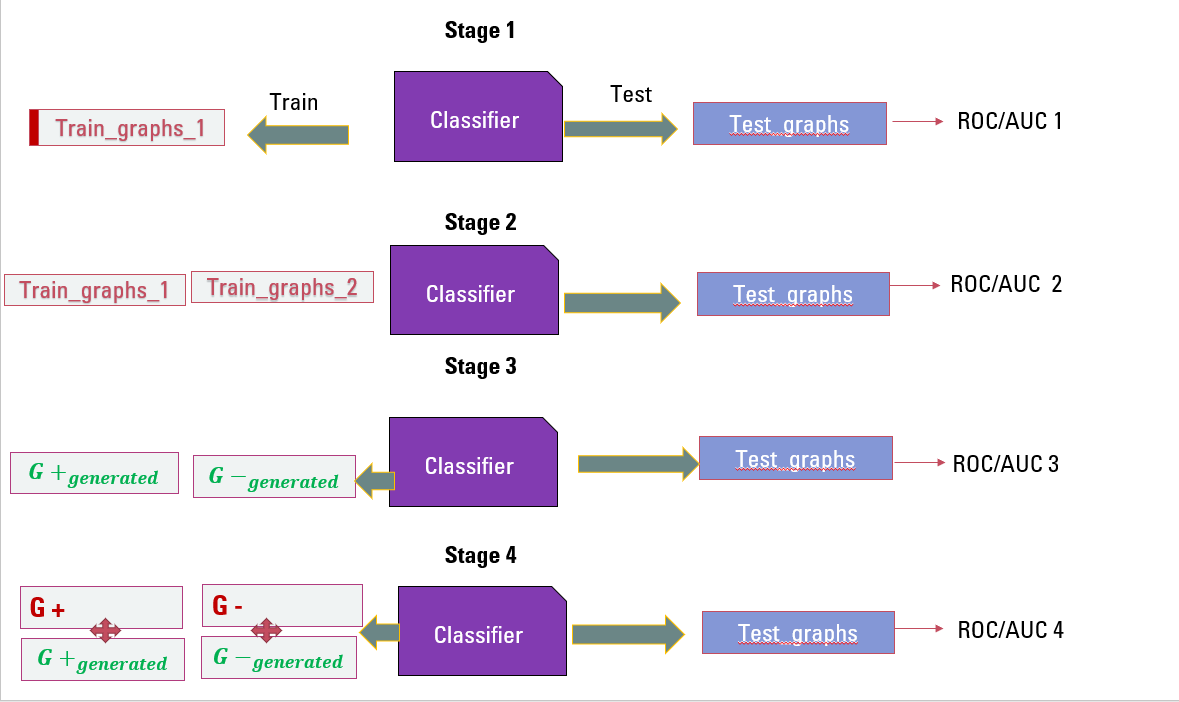

# NN classifier  with ogb AtomEncoder, BondEncoder

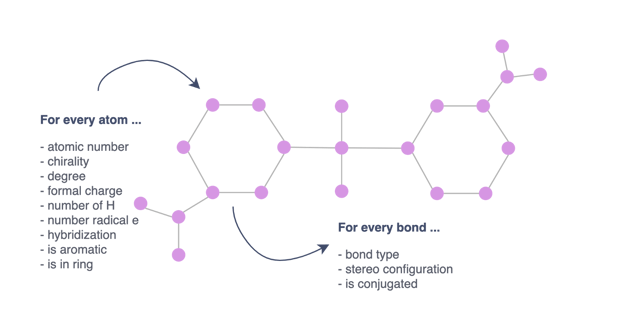